In [ ]:
import plyvel
import pandas as pd
import subprocess
import re
import ast
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 22})
#plt.rcParams.update({'size': (10,10)})


# Checking Progress of FAH Project

This notebook analyzes the database of a Folding@Home Workserver. With this you can check for the progress of projects. 
The database is a levelDB database so you must install levelDB on the computer where you run this notebook for the plyvel library to work.

## Download the database and project.xml

Please choose the path to the database in the server as if you were to use rsync (sergio@my_workserver:/my/path/to/worklevel.db) and the project number.

In [81]:
project_number = 18500
rsync_path = "./work.leveldb/"
project_path = f"p{project_number}-project.xml"
# rsync_path = "/home/sergio/bin/"

In [82]:
# print(f"rsync -uiha --del {rsync_path} work.level.db/")

## Process Database

In [83]:
# output = subprocess.run("rm -rf work.level.db/", shell=True)
# output = subprocess.run(
#     f"scp -r {rsync_path} ./work.level.db/", capture_output=True, shell=True
# )
# print("###############")
# print("Return code scp work.level.db:", output.returncode)
# print("###############")
# output = subprocess.run(
#     f"scp -r {project_path} work.level.db/project.xml", capture_output=True, shell=True
# )
# print("Return code scp project.xml:", output.returncode)
# print("###############")
# print("Output:", output.stdout.decode("utf-8"))

In [84]:
db = plyvel.DB("SVR2359493832_20220718_work.leveldb/work.leveldb", create_if_missing=False)

IOError: b'IO error: lock SVR2359493832_20220718_work.leveldb/work.leveldb/LOCK: already held by process'

## full database

In [85]:
l = []
for key, value in db:
    if re.search(f"P{project_number}", str(key)):
        entry = db.get(key)
        entry = ast.literal_eval(entry.decode("UTF-8"))
        l.append(entry)
df = pd.DataFrame()
df = df.append(l, ignore_index=True, sort=False)
df.head()

/var/folders/cf/d42qwdmd5_g5s63r3g_vgx2c0000gn/T/ipykernel_88326/680533947.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,server,state,project,core,run,clone,gen,retries,assigns,progress,last,assigned
0,2359493832,ASSIGNED,18500,34,0,0,219,0,252,0.438,2022-07-17T13:04:49Z,2022-07-17T13:04:49Z
1,2359493832,ASSIGNED,18500,34,0,1,202,1,243,0.404,2022-07-18T13:50:21Z,2022-07-18T13:50:21Z
2,2359493832,ASSIGNED,18500,34,0,10,161,1,202,0.322,2022-07-17T12:27:14Z,2022-07-17T12:27:14Z
3,2359493832,ASSIGNED,18500,34,0,100,123,0,161,0.246,2022-07-18T10:05:52Z,2022-07-18T10:05:52Z
4,2359493832,ASSIGNED,18500,34,0,101,138,0,170,0.276,2022-07-18T00:32:49Z,2022-07-18T00:32:49Z


In [86]:
df

,server,state,project,core,run,clone,gen,retries,assigns,progress,last,assigned
0,2359493832,ASSIGNED,18500,34,0,0,219,0,252,0.438,2022-07-17T13:04:49Z,2022-07-17T13:04:49Z
1,2359493832,ASSIGNED,18500,34,0,1,202,1,243,0.404,2022-07-18T13:50:21Z,2022-07-18T13:50:21Z
2,2359493832,ASSIGNED,18500,34,0,10,161,1,202,0.322,2022-07-17T12:27:14Z,2022-07-17T12:27:14Z
3,2359493832,ASSIGNED,18500,34,0,100,123,0,161,0.246,2022-07-18T10:05:52Z,2022-07-18T10:05:52Z
4,2359493832,ASSIGNED,18500,34,0,101,138,0,170,0.276,2022-07-18T00:32:49Z,2022-07-18T00:32:49Z
...,...,...,...,...,...,...,...,...,...,...,...,...
395,2359493832,ASSIGNED,18500,34,1,95,116,0,156,0.232,2022-07-18T12:41:42Z,2022-07-18T12:41:42Z
396,2359493832,ASSIGNED,18500,34,1,96,101,0,132,0.202,2022-07-16T23:50:38Z,2022-07-16T23:50:38Z
397,2359493832,ASSIGNED,18500,34,1,97,142,0,174,0.284,2022-07-18T15:52:23Z,2022-07-18T15:52:23Z
398,2359493832,ASSIGNED,18500,34,1,98,124,1,159,0.248,2022-07-18T10:17:06Z,2022-07-18T10:17:06Z


In [87]:
#file = open("work.level.db/project.xml", "r")
file = open(project_path, "r")
for line in file:
    if re.search("runs", line):
        myRegex = re.compile(r"[0-9]+")
        n_runs = int(myRegex.findall(line)[0])
    if re.search("clones", line):
        myRegex = re.compile(r"[0-9]+")
        n_clones = int(myRegex.findall(line)[0])
    if re.search("gens", line):
        myRegex = re.compile(r"[0-9]+")
        n_gens = int(myRegex.findall(line)[0])
print(f"P{project_number} has {n_runs} runs with {n_clones} clones and {n_gens} gens.")

P18500 has 2 runs with 200 clones and 500 gens.


## Progress of project

In [ ]:
finished_clones = df[np.logical_and(df.gen == n_gens, df.state == "FINISHED")].shape[0]
print(
    f"Finished {finished_clones} clones which is {100 * finished_clones / n_runs / n_clones:3.1f} % of clones."
)
finished_WU = np.sum(df.gen)
print(
    f"Finished {finished_WU} WU which is {100 * finished_WU / n_runs / n_clones / n_gens:3.1f} % of clones."
)

failed_clones = df[df.state == "FAILED"].shape[0]
print(
    f"Failed {failed_clones} clones which is {100 * failed_clones / n_runs / n_clones:3.1f} % of clones."
)
assigned_clones = df[df.state == "ASSIGNED"].shape[0]
print(
    f"Assigned {assigned_clones} clones which is {100 * assigned_clones / n_runs / n_clones:3.1f} % of clones."
)

Text(0.5, 1.0, 'Probability distribution of clones')

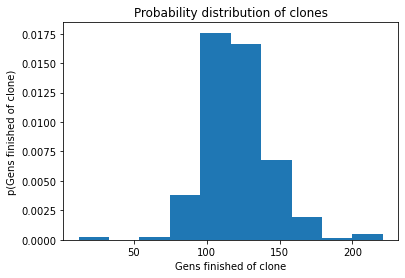

In [89]:
fig, ax = plt.subplots(1, 1)
n, bins, patches = ax.hist(df.gen, cumulative=False, density=True)
ax.set_xlabel("Gens finished of clone")
ax.set_ylabel("p(Gens finished of clone)")
ax.set_title("Probability distribution of clones")

Text(0.5, 1.0, 'CDF')

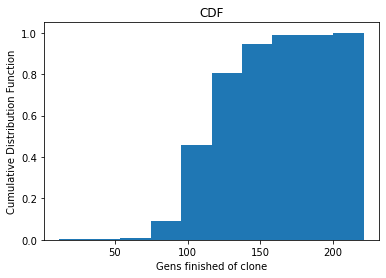

In [90]:
fig, ax = plt.subplots(1, 1)
n, bins, patches = ax.hist(df.gen, cumulative=True, density=True)
ax.set_xlabel("Gens finished of clone")
ax.set_ylabel("Cumulative Distribution Function")
ax.set_title("CDF")

## Distribution of traj lengths

In [91]:
def plot_traj_lengths(df):
    wu_length = 10 # in ns
    traj_lengths_ns = df['gen'].values*wu_length
    plt.figure(figsize=(10,10))
    plt.hist(traj_lengths_ns, range=(0, traj_lengths_ns.max()), bins=25)
    plt.xlabel("Traj length (ns)")
    plt.ylabel("Number of CLONEs")
    plt.xlim([0,2000])
    plt.title(f"p{project_number}: "+str(traj_lengths_ns.sum()/1000)+ " $\mu$s")
    plt.savefig("p%s-traj-distribution.png" % str(project_number), dpi=300)
    return traj_lengths_ns

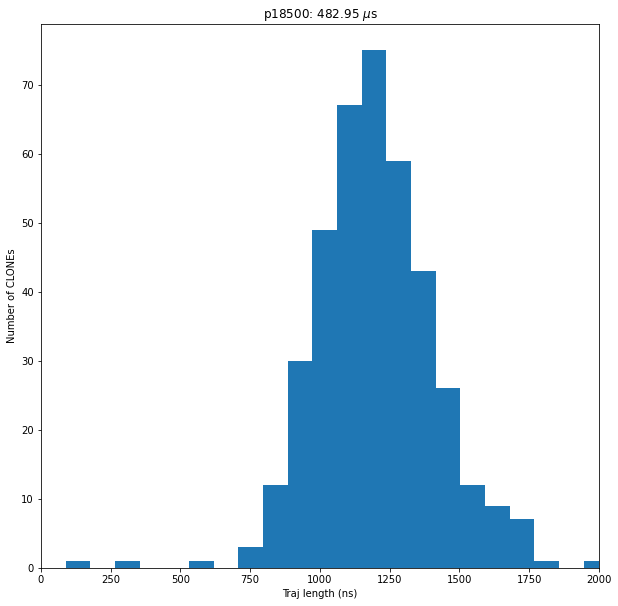

In [92]:
traj_length_df = plot_traj_lengths(df)

## Distribution by Runs

array([2190, 2020, 1610, 1230, 1380, 1090, 1160, 1060, 1050, 1230, 1150,
        970, 1150, 1520,  720, 1000, 1090, 1130, 1270,  820, 1410, 1410,
       1260, 1020, 1710,  970, 1010, 1060, 1290,  900, 1190, 1160, 1130,
       1060, 1180, 1640, 1150, 1320, 1050, 1330, 1200, 1280, 1080, 1210,
       1390, 1030, 1480, 1210, 1180, 1290, 1130, 1010, 1110, 1260, 1270,
       1060, 1060, 1160, 1240, 1060,  960,  990, 1230, 1330, 1200,  840,
       1030, 1240, 1530,  860, 1120, 1130, 1380,  930, 1090, 1220,  900,
       1080, 1160, 1530, 1120, 1050, 1480, 1280, 1060,  890, 1160,  890,
        560,  870, 1180, 1160, 1040,  780, 1150, 1070,  970, 1260,  990,
       1120, 1290, 1290,  910, 1120, 1090, 1230, 1180,  780, 1070, 1090,
       1220, 1170, 1140,  960, 1520, 1340, 1330, 1360, 1600, 1350, 1570,
       1490, 1380, 1760, 1430, 1220, 1380, 1170, 1520, 1290, 1570, 1030,
       1310, 1720, 1360, 1320, 1250, 1210, 1290, 1520, 1410, 1080, 1070,
       1310, 1680, 1500, 1350, 1210, 1260, 1390, 12

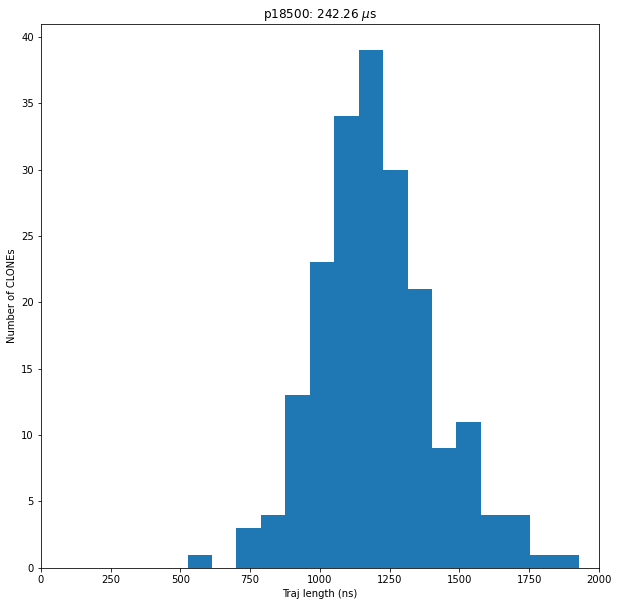

In [93]:
run0df = df[df['run'] == 0]
plot_traj_lengths(run0df)

array([2130, 2210, 1310,  800, 1330, 1020, 1040,  820, 1260, 1080,  960,
       1000, 1100, 1390,  930, 1250, 1060, 1400, 1030, 1340, 1260,  880,
       1090, 1110, 1490, 1110, 1260, 1170, 1130, 1190, 1270, 1180, 1080,
        120, 1150, 1480, 1640,  930,  970, 1500, 1100,  970, 1260, 1270,
       1220, 1050, 1670, 1450,  800, 1260, 1070,  830, 1510, 1040, 1020,
       1040, 1430, 1630,  310, 1160, 1130, 1080, 1280, 1020, 1230,  970,
        910, 1390, 1600, 1100, 1090, 1010,  920, 1190,  950, 1140,  920,
       1040, 1280, 1330, 1040, 1040, 1090, 1140, 1140, 1390, 1210,  800,
        840, 1020, 1410, 1450, 1140, 1180, 1080, 1180,  930, 1220, 1230,
       1360, 1000, 1210, 1240, 1310, 1120, 1520, 1070, 1260, 1460, 1430,
       1070, 1160, 1480, 1080, 1320, 1420, 1410, 1200, 1640, 1210, 1080,
       1150, 1300, 1750, 1430, 1220, 1240, 1530, 1320, 1410, 1310, 1430,
       1450, 1200, 1370, 1450, 1410, 1190, 1300, 1340, 1080, 1320, 1140,
       1070, 1220, 1150, 1200, 1290, 1230, 1050, 12

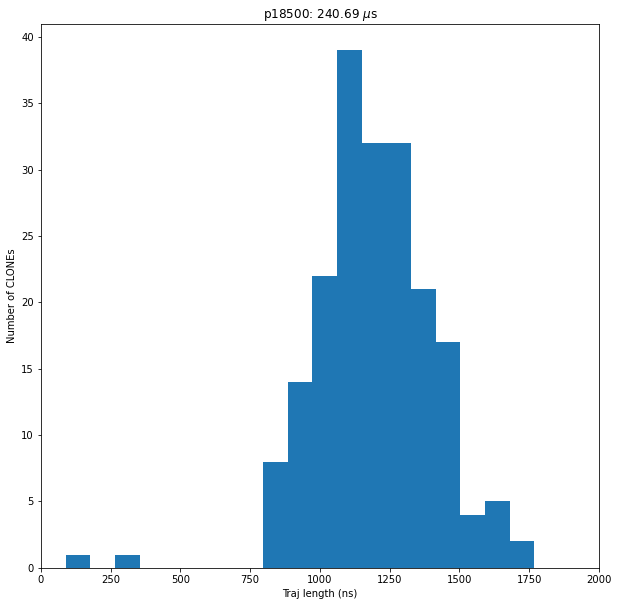

In [95]:
run1df = df[df['run'] == 1]
plot_traj_lengths(run1df)

In [96]:
import plotly.express as px

In [97]:
df['Traj length (ns)'] = df['gen'] * 10

In [98]:
df

,server,state,project,core,run,clone,gen,retries,assigns,progress,last,assigned,Traj length (ns)
0,2359493832,ASSIGNED,18500,34,0,0,219,0,252,0.438,2022-07-17T13:04:49Z,2022-07-17T13:04:49Z,2190
1,2359493832,ASSIGNED,18500,34,0,1,202,1,243,0.404,2022-07-18T13:50:21Z,2022-07-18T13:50:21Z,2020
2,2359493832,ASSIGNED,18500,34,0,10,161,1,202,0.322,2022-07-17T12:27:14Z,2022-07-17T12:27:14Z,1610
3,2359493832,ASSIGNED,18500,34,0,100,123,0,161,0.246,2022-07-18T10:05:52Z,2022-07-18T10:05:52Z,1230
4,2359493832,ASSIGNED,18500,34,0,101,138,0,170,0.276,2022-07-18T00:32:49Z,2022-07-18T00:32:49Z,1380
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2359493832,ASSIGNED,18500,34,1,95,116,0,156,0.232,2022-07-18T12:41:42Z,2022-07-18T12:41:42Z,1160
396,2359493832,ASSIGNED,18500,34,1,96,101,0,132,0.202,2022-07-16T23:50:38Z,2022-07-16T23:50:38Z,1010
397,2359493832,ASSIGNED,18500,34,1,97,142,0,174,0.284,2022-07-18T15:52:23Z,2022-07-18T15:52:23Z,1420
398,2359493832,ASSIGNED,18500,34,1,98,124,1,159,0.248,2022-07-18T10:17:06Z,2022-07-18T10:17:06Z,1240


In [100]:
fig = px.histogram(df, 
             x='Traj length (ns)', 
             color='run',
            #title=f'p{project_number}: {str(traj_length_df.sum()/1000)} µs',
#                    title="Distribution of Trajectories on Folding@home by Starting State",
                   color_discrete_sequence=[get_rbg_str_from_pymol_colors(palecyan), get_rbg_str_from_pymol_colors(wheat)],
                   labels={"run": "<b>Run</b>"}
                  )
fig.update_xaxes(range=[0, 2500])
fig.update_yaxes(range=[0, 40])
fig.update_layout(height=900, 
                  width=1200, 
                  barmode='overlay', 
                  font=dict(size=36, 
                           family="Helvetica"),
                  plot_bgcolor="#FFF",  # Sets background color to white
                    xaxis=dict(
                        title="<b>Trajectory Length (ns)</b>",
                        linecolor="#BCCCDC",  # Sets color of X-axis line
                        showgrid=False  # Removes X-axis grid lines
                    ),
                    yaxis=dict(
                        title="<b># of Trajectories</b>",  
                        linecolor="#BCCCDC",  # Sets color of Y-axis line
                        showgrid=False,  # Removes Y-axis grid lines    
                    )
                 )
fig.update_traces(opacity=0.7, 
                  xbins={'size':50},
#                  marker=dict(size=20)
                 )
# fig.update_traces(xbins={'size':50})
# trace_names = ["<b>Open State</b>", "<b>Closed State</b>"]
trace_names = ["Open State", "Closed State"]
for idx, name in enumerate(trace_names):
    fig.data[idx].name = name
    fig.data[idx].hovertemplate = name

fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.01,
    xanchor="right",
    x=0.99,
    font=dict(size=48, family='Helvetica'),
    itemsizing='constant',
#     markersize=20
    
))

# fig.update_layout(legend=dict(
#     yanchor="top",
#     y=0.99,
#     xanchor="right",
#     x=0.99
# ))

fig.show()
fig.write_image("20220718_p18500_distribution_by_state.png")

In [53]:
fig.layout

Layout({
    'barmode': 'overlay',
    'font': {'family': 'Helvetica', 'size': 36},
    'height': 900,
    'legend': {'font': {'family': 'Helvetica', 'size': 48},
               'itemsizing': 'constant',
               'title': {'text': '<b>Run</b>'},
               'tracegroupgap': 0,
               'x': 0.99,
               'xanchor': 'right',
               'y': 0.01,
               'yanchor': 'bottom'},
    'margin': {'t': 60},
    'plot_bgcolor': '#FFF',
    'template': '...',
    'width': 1200,
    'xaxis': {'anchor': 'y',
              'domain': [0.0, 1.0],
              'linecolor': '#BCCCDC',
              'range': [0, 2500],
              'showgrid': False,
              'title': {'text': '<b>Trajectory Length (ns)</b>'}},
    'yaxis': {'anchor': 'x',
              'domain': [0.0, 1.0],
              'linecolor': '#BCCCDC',
              'range': [0, 40],
              'showgrid': False,
              'title': {'text': '<b># of Trajectories</b>'}}
})

# playing around with colors

In [5]:
import plotly.express.colors as c

In [6]:
c.qualitative.Pastel1[1]

'rgb(179,205,227)'

In [7]:
px.colors.label_rgb(px.colors.convert_to_RGB_255(palecyan))

NameError: name 'px' is not defined

In [8]:
def get_rbg_str_from_pymol_colors(pymol_color):
    return px.colors.label_rgb(px.colors.convert_to_RGB_255(pymol_color))

In [9]:
get_rbg_str_from_pymol_colors(palecyan)

NameError: name 'palecyan' is not defined

## pymol colors

https://pymolwiki.org/index.php/Color_Values

In [10]:
palecyan = (0.8, 1.0, 1.0)
wheat = (0.99, 0.82, 0.65)

In [60]:
get_rbg_str_from_pymol_colors(wheat)

'rgb(252, 209, 166)'